### Neurons

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x_ = np.array([[3, 5],
               [5, 1],
               [10, 2]])
y_ = np.array([[75], [82], [93]])

In [3]:
# Normalized
x_ = x_/np.amax(x_, axis=0)
y_ = y_/100

$$\begin{bmatrix} 3 & 5 \\ 5 & 1 \\ 10 & 2 \end{bmatrix}\begin{bmatrix} w_{11}^{(1)}  & w_{12}^{(1)} & w_{13}^{(1)} 
\\ w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \end{bmatrix} = 
\begin{bmatrix}
   3w_{11}^{(1)} + 5w_{21}^{(1)} & 3w_{12}^{(1)} + 5w_{22}^{(1)} & 3w_{13}^{(1)} + 5w_{23}^{(1)} 
\\ 5w_{11}^{(1)} + w_{21}^{(1)} & 5w_{12}^{(1)} + w_{22}^{(1)} & 5w_{13}^{(1)} + w_{23}^{(1)} 
\\ 10w_{11}^{(1)} + 2w_{21}^{(1)} & 10w_{12}^{(1)} + 2w_{22}^{(1)} & 10w_{13}^{(1)} + 2w_{23}^{(1)} 
\end{bmatrix} $$
<br>
$$
\begin{equation*} 
Z^{(2)} = XW^{(1)}
\end{equation*} \tag{1}$$
Where &emsp; $ Z^{(2)} $ is a 3x3 matrix
<br> &emsp;&emsp;&emsp;&emsp; $ W^{(1)} $ is the first hidden layer weight



In [4]:
def sigmoid(z):
    # Sigmoid activation function
    return 1/(1+np.exp(-z))

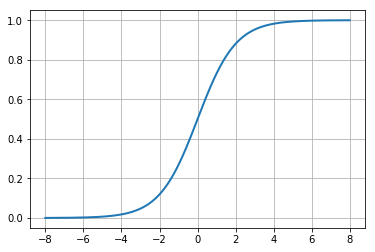

In [5]:
input_ = np.arange(-8,8,0.01)
plt.plot(input_, sigmoid(input_), linewidth=2)
plt.grid(1)

##### <center> Sigmoid function
$$\begin{equation*} \tag{2} f = \frac{1}{1+e^{-z}} \end{equation*} $$
<br>
$$ \begin{equation*} \tag{2}   a^{(2)}= f(z^{(2)}) \end{equation*} $$
Where &emsp; $ a^{(2)} $ is a 3x3 matrix


##### <center> Second hidden layer
$$\begin{equation*} \tag{3} z^{(3)} = a^{(2)}W^{(2)}  \end{equation*} $$
Where &emsp; $ W^{(2)} $ is a 3x1 matrix, second hidden layer weight
<br>&emsp;&emsp;&emsp;&emsp; $z^{(3)}$ is a 3x1 matrix


##### <center> Output prediction
$$\begin{equation*} \tag{4} \hat{y} = f(z^{(3)}) \end{equation*} $$

In [6]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        np.random.seed(0)
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

    def computeNumericalGradient(N, X, y):
            paramsInitial = N.getParams()
            numgrad = np.zeros(paramsInitial.shape)
            perturb = np.zeros(paramsInitial.shape)
            e = 1e-4

            for p in range(len(paramsInitial)):
                #Set perturbation vector
                perturb[p] = e
                N.setParams(paramsInitial + perturb)
                loss2 = N.costFunction(X, y)

                N.setParams(paramsInitial - perturb)
                loss1 = N.costFunction(X, y)

                #Compute Numerical Gradient
                numgrad[p] = (loss2 - loss1) / (2*e)

                #Return the value we changed to zero:
                perturb[p] = 0

            #Return Params to original value:
            N.setParams(paramsInitial)

            return numgrad 
    def weights(self):
        print(self.W1)
        print(self.W2)

##### Minimize cost function
$$ \begin{equation*} \tag{5}  J = \sum_{} \frac{1}{2}(y - \hat{y})^{2}  \end{equation*}$$

##### Combining all equations together
$$ \begin{equation*} \tag{5}  J = \sum_{} \frac{1}{2}(y - f(f(XW^{(1)})W^{(2)})^{2}  \end{equation*}$$

We have 9 weights, find the best combination to minimize the cost
<br> $$ w_{11}^{(1)} w_{12}^{(1)} w_{13}^{(1)} $$ 
<br> $$ w_{21}^{(1)} w_{22}^{(1)} w_{23}^{(1)} $$
<br> $$ w_{11}^{(2)} w_{12}^{(2)} w_{13}^{(2)} $$ 

##### Optimize!

Where we need to find the solutions to $  \frac{\partial J}{\partial W^{(1)}} , \frac{\partial J}{\partial W^{(2)}}$
$$\frac{\partial J}{\partial W^{(1)}} = \begin{bmatrix}
   \frac{\partial J}{\partial W_{11}^{(1)}} & \frac{\partial J}{\partial W_{12}^{(1)}} & \frac{\partial J}{\partial W_{13}^{(1)}} 
\\ \frac{\partial J}{\partial W_{21}^{(1)}} & \frac{\partial J}{\partial W_{22}^{(1)}} & \frac{\partial J}{\partial W_{23}^{(1)}}
\end{bmatrix} $$
<br>
$$\frac{\partial J}{\partial W^{(2)}} = \begin{bmatrix}
   \frac{\partial J}{\partial W_{11}^{(2)}}  
\\ \frac{\partial J}{\partial W_{21}^{(2)}} 
\\ \frac{\partial J}{\partial W_{31}^{(2)}} 
\end{bmatrix} $$

##### Starting with $ \frac{\partial J}{\partial W^{(2)}} $

$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =  \frac{\partial \sum_{} \frac{1}{2}(y - \hat{y})^{2}}{\partial W^{(2)}} \end{equation*}$$
<br> Where using "Sum Rule In Differentiation" <br>
$ \frac{d}{dx}(u+v) = \frac{du}{dx} + \frac{dv}{dx} $
<br><br>
The equation becomes
$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =   \sum_{} (y - \hat{y})\frac{\partial (y - \hat{y})}{\partial W^{(2)}} \end{equation*}$$
$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =   \sum_{}(-1) (y - \hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial  z^{(3)}}{\partial W^{(2)}} \end{equation*}$$
<br> Sidestepping, where we have   $$\hat{y} = f(z^{(3)})$$
<br> $$ f(z) = \frac{1}{1+e^{-z}} $$
<br> $$ f'(z) = \frac{e^{(-z)}}{(1+e^{-z})^2} $$
<br> Rewritten as $$ f'(z) = f(z)(1-f(z)) $$

In [7]:
# def sigmoidPrime(z):
#     # Derivative of Sigmoid function
#     return sigmoid(z)*(1-sigmoid(z))

In [8]:
NN = Neural_Network()
yHat = NN.forward(x_)
NN.weights()

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]
[[ 0.95008842]
 [-0.15135721]
 [-0.10321885]]


In [9]:
yHat

array([[0.67399915],
       [0.64461564],
       [0.66968583]])

In [10]:
y_

array([[0.75],
       [0.82],
       [0.93]])

In [25]:
import time
# Time it takes to do 1000 

weightsToTry = np.linspace(-10,10,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(x_)
    costs[i] = 0.5*sum((y_-yHat)**2)
    
endTime = time.clock()
timeElapsed = endTime-startTime
timeElapsed

0.04646571429572077

Text(0.5,0,'Weight')

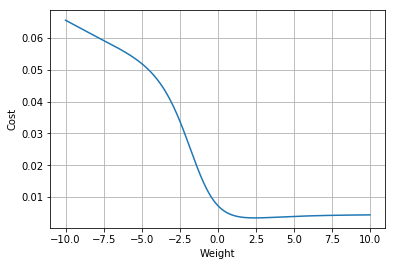

In [26]:
plt.plot(weightsToTry, costs)
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')

In [27]:
# import time
# # Time it takes to do 1000 x 1000 combinations

# weightsToTry = np.linspace(-5,5,1000)
# costs = np.zeros((1000,1000))

# startTime = time.clock()
# for i in range(1000):
#     for j in range(1000):
#         NN.W1[0,0] = weightsToTry[i]
#         NN.W1[0,1] = weightsToTry[j]
#         yHat = NN.forward(x_)
#         costs[i] = 0.5*sum((y_-yHat)**2)
    
# endTime = time.clock()
# timeElapsed = endTime-startTime
# timeElapsed

In [28]:
NN = Neural_Network()
cost1 = NN.costFunction(x_,y_)

In [29]:
dJdW1, dJdW2 = NN.costFunctionPrime(x_,y_)

In [30]:
dJdW1

array([[-0.00676245,  0.00237555,  0.00198723],
       [-0.00347965,  0.00118596,  0.00113303]])

In [31]:
dJdW2

array([[-0.10131067],
       [-0.08408982],
       [-0.06564025]])

In [32]:
scalar = 3
# Uphill, adding
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(x_,y_)

In [33]:
print(cost1, cost2)

[0.05214963] [0.14937952]


In [34]:
# Downhill, subracting
dJdW1, dJdW2 = NN.costFunctionPrime(x_,y_)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost2 = NN.costFunction(x_,y_)

In [35]:
print(cost1, cost2)

[0.05214963] [0.01327816]


In [36]:
for i in range(4,10000):
    cost = cost2.copy()
    dJdW1, dJdW2 = NN.costFunctionPrime(x_,y_)
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
    cost2 = NN.costFunction(x_,y_)
    print(cost, cost2)

[0.01327816] [0.00965991]
[0.00965991] [0.00855458]
[0.00855458] [0.00810389]
[0.00810389] [0.00788201]
[0.00788201] [0.00775258]
[0.00775258] [0.00766383]
[0.00766383] [0.00759398]
[0.00759398] [0.00753328]
[0.00753328] [0.00747714]
[0.00747714] [0.00742334]
[0.00742334] [0.00737079]
[0.00737079] [0.00731896]
[0.00731896] [0.00726756]
[0.00726756] [0.00721645]
[0.00721645] [0.00716556]
[0.00716556] [0.00711485]
[0.00711485] [0.00706429]
[0.00706429] [0.00701388]
[0.00701388] [0.0069636]
[0.0069636] [0.00691346]
[0.00691346] [0.00686344]
[0.00686344] [0.00681355]
[0.00681355] [0.00676378]
[0.00676378] [0.00671413]
[0.00671413] [0.00666461]
[0.00666461] [0.0066152]
[0.0066152] [0.0065659]
[0.0065659] [0.00651672]
[0.00651672] [0.00646766]
[0.00646766] [0.00641871]
[0.00641871] [0.00636987]
[0.00636987] [0.00632115]
[0.00632115] [0.00627254]
[0.00627254] [0.00622405]
[0.00622405] [0.00617567]
[0.00617567] [0.0061274]
[0.0061274] [0.00607925]
[0.00607925] [0.00603122]
[0.00603122] [0.0059

[0.00132545] [0.00132505]
[0.00132505] [0.00132465]
[0.00132465] [0.00132426]
[0.00132426] [0.00132387]
[0.00132387] [0.00132347]
[0.00132347] [0.00132308]
[0.00132308] [0.00132269]
[0.00132269] [0.0013223]
[0.0013223] [0.00132192]
[0.00132192] [0.00132153]
[0.00132153] [0.00132115]
[0.00132115] [0.00132076]
[0.00132076] [0.00132038]
[0.00132038] [0.00132]
[0.00132] [0.00131962]
[0.00131962] [0.00131924]
[0.00131924] [0.00131886]
[0.00131886] [0.00131849]
[0.00131849] [0.00131811]
[0.00131811] [0.00131774]
[0.00131774] [0.00131737]
[0.00131737] [0.001317]
[0.001317] [0.00131663]
[0.00131663] [0.00131626]
[0.00131626] [0.00131589]
[0.00131589] [0.00131552]
[0.00131552] [0.00131516]
[0.00131516] [0.00131479]
[0.00131479] [0.00131443]
[0.00131443] [0.00131406]
[0.00131406] [0.0013137]
[0.0013137] [0.00131334]
[0.00131334] [0.00131298]
[0.00131298] [0.00131262]
[0.00131262] [0.00131226]
[0.00131226] [0.00131191]
[0.00131191] [0.00131155]
[0.00131155] [0.0013112]
[0.0013112] [0.00131084]
[0

[0.00116764] [0.00116742]
[0.00116742] [0.00116719]
[0.00116719] [0.00116696]
[0.00116696] [0.00116673]
[0.00116673] [0.0011665]
[0.0011665] [0.00116627]
[0.00116627] [0.00116605]
[0.00116605] [0.00116582]
[0.00116582] [0.00116559]
[0.00116559] [0.00116536]
[0.00116536] [0.00116513]
[0.00116513] [0.0011649]
[0.0011649] [0.00116467]
[0.00116467] [0.00116444]
[0.00116444] [0.00116421]
[0.00116421] [0.00116398]
[0.00116398] [0.00116375]
[0.00116375] [0.00116352]
[0.00116352] [0.00116329]
[0.00116329] [0.00116306]
[0.00116306] [0.00116283]
[0.00116283] [0.0011626]
[0.0011626] [0.00116237]
[0.00116237] [0.00116214]
[0.00116214] [0.00116191]
[0.00116191] [0.00116168]
[0.00116168] [0.00116145]
[0.00116145] [0.00116122]
[0.00116122] [0.00116098]
[0.00116098] [0.00116075]
[0.00116075] [0.00116052]
[0.00116052] [0.00116029]
[0.00116029] [0.00116006]
[0.00116006] [0.00115983]
[0.00115983] [0.00115959]
[0.00115959] [0.00115936]
[0.00115936] [0.00115913]
[0.00115913] [0.0011589]
[0.0011589] [0.0011

[0.00100669] [0.0010063]
[0.0010063] [0.00100592]
[0.00100592] [0.00100553]
[0.00100553] [0.00100515]
[0.00100515] [0.00100476]
[0.00100476] [0.00100437]
[0.00100437] [0.00100398]
[0.00100398] [0.00100359]
[0.00100359] [0.00100321]
[0.00100321] [0.00100282]
[0.00100282] [0.00100243]
[0.00100243] [0.00100204]
[0.00100204] [0.00100165]
[0.00100165] [0.00100126]
[0.00100126] [0.00100087]
[0.00100087] [0.00100047]
[0.00100047] [0.00100008]
[0.00100008] [0.00099969]
[0.00099969] [0.0009993]
[0.0009993] [0.0009989]
[0.0009989] [0.00099851]
[0.00099851] [0.00099812]
[0.00099812] [0.00099772]
[0.00099772] [0.00099733]
[0.00099733] [0.00099693]
[0.00099693] [0.00099654]
[0.00099654] [0.00099614]
[0.00099614] [0.00099574]
[0.00099574] [0.00099535]
[0.00099535] [0.00099495]
[0.00099495] [0.00099455]
[0.00099455] [0.00099415]
[0.00099415] [0.00099375]
[0.00099375] [0.00099336]
[0.00099336] [0.00099296]
[0.00099296] [0.00099256]
[0.00099256] [0.00099216]
[0.00099216] [0.00099176]
[0.00099176] [0.00

[0.00086357] [0.00086306]
[0.00086306] [0.00086256]
[0.00086256] [0.00086205]
[0.00086205] [0.00086154]
[0.00086154] [0.00086103]
[0.00086103] [0.00086053]
[0.00086053] [0.00086002]
[0.00086002] [0.00085951]
[0.00085951] [0.000859]
[0.000859] [0.00085849]
[0.00085849] [0.00085798]
[0.00085798] [0.00085747]
[0.00085747] [0.00085696]
[0.00085696] [0.00085645]
[0.00085645] [0.00085594]
[0.00085594] [0.00085543]
[0.00085543] [0.00085492]
[0.00085492] [0.00085441]
[0.00085441] [0.00085389]
[0.00085389] [0.00085338]
[0.00085338] [0.00085287]
[0.00085287] [0.00085236]
[0.00085236] [0.00085184]
[0.00085184] [0.00085133]
[0.00085133] [0.00085082]
[0.00085082] [0.0008503]
[0.0008503] [0.00084979]
[0.00084979] [0.00084928]
[0.00084928] [0.00084876]
[0.00084876] [0.00084825]
[0.00084825] [0.00084773]
[0.00084773] [0.00084721]
[0.00084721] [0.0008467]
[0.0008467] [0.00084618]
[0.00084618] [0.00084567]
[0.00084567] [0.00084515]
[0.00084515] [0.00084463]
[0.00084463] [0.00084412]
[0.00084412] [0.0008

[0.00069132] [0.00069076]
[0.00069076] [0.00069021]
[0.00069021] [0.00068966]
[0.00068966] [0.00068911]
[0.00068911] [0.00068856]
[0.00068856] [0.000688]
[0.000688] [0.00068745]
[0.00068745] [0.0006869]
[0.0006869] [0.00068635]
[0.00068635] [0.0006858]
[0.0006858] [0.00068525]
[0.00068525] [0.00068469]
[0.00068469] [0.00068414]
[0.00068414] [0.00068359]
[0.00068359] [0.00068304]
[0.00068304] [0.00068249]
[0.00068249] [0.00068194]
[0.00068194] [0.00068139]
[0.00068139] [0.00068083]
[0.00068083] [0.00068028]
[0.00068028] [0.00067973]
[0.00067973] [0.00067918]
[0.00067918] [0.00067863]
[0.00067863] [0.00067808]
[0.00067808] [0.00067753]
[0.00067753] [0.00067698]
[0.00067698] [0.00067643]
[0.00067643] [0.00067587]
[0.00067587] [0.00067532]
[0.00067532] [0.00067477]
[0.00067477] [0.00067422]
[0.00067422] [0.00067367]
[0.00067367] [0.00067312]
[0.00067312] [0.00067257]
[0.00067257] [0.00067202]
[0.00067202] [0.00067147]
[0.00067147] [0.00067092]
[0.00067092] [0.00067037]
[0.00067037] [0.0006

[0.0004084] [0.00040799]
[0.00040799] [0.00040758]
[0.00040758] [0.00040716]
[0.00040716] [0.00040675]
[0.00040675] [0.00040634]
[0.00040634] [0.00040593]
[0.00040593] [0.00040552]
[0.00040552] [0.0004051]
[0.0004051] [0.00040469]
[0.00040469] [0.00040428]
[0.00040428] [0.00040387]
[0.00040387] [0.00040346]
[0.00040346] [0.00040305]
[0.00040305] [0.00040264]
[0.00040264] [0.00040224]
[0.00040224] [0.00040183]
[0.00040183] [0.00040142]
[0.00040142] [0.00040101]
[0.00040101] [0.0004006]
[0.0004006] [0.0004002]
[0.0004002] [0.00039979]
[0.00039979] [0.00039938]
[0.00039938] [0.00039898]
[0.00039898] [0.00039857]
[0.00039857] [0.00039817]
[0.00039817] [0.00039776]
[0.00039776] [0.00039736]
[0.00039736] [0.00039695]
[0.00039695] [0.00039655]
[0.00039655] [0.00039615]
[0.00039615] [0.00039574]
[0.00039574] [0.00039534]
[0.00039534] [0.00039494]
[0.00039494] [0.00039453]
[0.00039453] [0.00039413]
[0.00039413] [0.00039373]
[0.00039373] [0.00039333]
[0.00039333] [0.00039293]
[0.00039293] [0.000

[0.00021664] [0.00021642]
[0.00021642] [0.0002162]
[0.0002162] [0.00021597]
[0.00021597] [0.00021575]
[0.00021575] [0.00021553]
[0.00021553] [0.0002153]
[0.0002153] [0.00021508]
[0.00021508] [0.00021486]
[0.00021486] [0.00021464]
[0.00021464] [0.00021442]
[0.00021442] [0.0002142]
[0.0002142] [0.00021398]
[0.00021398] [0.00021376]
[0.00021376] [0.00021353]
[0.00021353] [0.00021331]
[0.00021331] [0.00021309]
[0.00021309] [0.00021288]
[0.00021288] [0.00021266]
[0.00021266] [0.00021244]
[0.00021244] [0.00021222]
[0.00021222] [0.000212]
[0.000212] [0.00021178]
[0.00021178] [0.00021156]
[0.00021156] [0.00021134]
[0.00021134] [0.00021113]
[0.00021113] [0.00021091]
[0.00021091] [0.00021069]
[0.00021069] [0.00021047]
[0.00021047] [0.00021026]
[0.00021026] [0.00021004]
[0.00021004] [0.00020982]
[0.00020982] [0.00020961]
[0.00020961] [0.00020939]
[0.00020939] [0.00020918]
[0.00020918] [0.00020896]
[0.00020896] [0.00020875]
[0.00020875] [0.00020853]
[0.00020853] [0.00020832]
[0.00020832] [0.000208

[0.00015359] [0.00015344]
[0.00015344] [0.00015328]
[0.00015328] [0.00015313]
[0.00015313] [0.00015297]
[0.00015297] [0.00015282]
[0.00015282] [0.00015267]
[0.00015267] [0.00015251]
[0.00015251] [0.00015236]
[0.00015236] [0.00015221]
[0.00015221] [0.00015205]
[0.00015205] [0.0001519]
[0.0001519] [0.00015175]
[0.00015175] [0.00015159]
[0.00015159] [0.00015144]
[0.00015144] [0.00015129]
[0.00015129] [0.00015114]
[0.00015114] [0.00015099]
[0.00015099] [0.00015083]
[0.00015083] [0.00015068]
[0.00015068] [0.00015053]
[0.00015053] [0.00015038]
[0.00015038] [0.00015023]
[0.00015023] [0.00015008]
[0.00015008] [0.00014993]
[0.00014993] [0.00014978]
[0.00014978] [0.00014963]
[0.00014963] [0.00014948]
[0.00014948] [0.00014932]
[0.00014932] [0.00014917]
[0.00014917] [0.00014903]
[0.00014903] [0.00014888]
[0.00014888] [0.00014873]
[0.00014873] [0.00014858]
[0.00014858] [0.00014843]
[0.00014843] [0.00014828]
[0.00014828] [0.00014813]
[0.00014813] [0.00014798]
[0.00014798] [0.00014783]
[0.00014783] [

[8.27177525e-05] [8.26388032e-05]
[8.26388032e-05] [8.25599356e-05]
[8.25599356e-05] [8.24811496e-05]
[8.24811496e-05] [8.24024451e-05]
[8.24024451e-05] [8.23238221e-05]
[8.23238221e-05] [8.22452804e-05]
[8.22452804e-05] [8.21668199e-05]
[8.21668199e-05] [8.20884406e-05]
[8.20884406e-05] [8.20101424e-05]
[8.20101424e-05] [8.19319251e-05]
[8.19319251e-05] [8.18537887e-05]
[8.18537887e-05] [8.17757331e-05]
[8.17757331e-05] [8.16977582e-05]
[8.16977582e-05] [8.16198639e-05]
[8.16198639e-05] [8.15420501e-05]
[8.15420501e-05] [8.14643167e-05]
[8.14643167e-05] [8.13866636e-05]
[8.13866636e-05] [8.13090908e-05]
[8.13090908e-05] [8.12315982e-05]
[8.12315982e-05] [8.11541856e-05]
[8.11541856e-05] [8.1076853e-05]
[8.1076853e-05] [8.09996002e-05]
[8.09996002e-05] [8.09224272e-05]
[8.09224272e-05] [8.0845334e-05]
[8.0845334e-05] [8.07683203e-05]
[8.07683203e-05] [8.06913862e-05]
[8.06913862e-05] [8.06145314e-05]
[8.06145314e-05] [8.05377561e-05]
[8.05377561e-05] [8.04610599e-05]
[8.04610599e-05] [

[6.03760718e-05] [6.03198952e-05]
[6.03198952e-05] [6.0263775e-05]
[6.0263775e-05] [6.02077109e-05]
[6.02077109e-05] [6.01517031e-05]
[6.01517031e-05] [6.00957514e-05]
[6.00957514e-05] [6.00398557e-05]
[6.00398557e-05] [5.9984016e-05]
[5.9984016e-05] [5.99282322e-05]
[5.99282322e-05] [5.98725043e-05]
[5.98725043e-05] [5.98168322e-05]
[5.98168322e-05] [5.97612158e-05]
[5.97612158e-05] [5.97056551e-05]
[5.97056551e-05] [5.965015e-05]
[5.965015e-05] [5.95947005e-05]
[5.95947005e-05] [5.95393065e-05]
[5.95393065e-05] [5.94839679e-05]
[5.94839679e-05] [5.94286847e-05]
[5.94286847e-05] [5.93734568e-05]
[5.93734568e-05] [5.93182842e-05]
[5.93182842e-05] [5.92631668e-05]
[5.92631668e-05] [5.92081044e-05]
[5.92081044e-05] [5.91530972e-05]
[5.91530972e-05] [5.9098145e-05]
[5.9098145e-05] [5.90432477e-05]
[5.90432477e-05] [5.89884054e-05]
[5.89884054e-05] [5.89336178e-05]
[5.89336178e-05] [5.8878885e-05]
[5.8878885e-05] [5.8824207e-05]
[5.8824207e-05] [5.87695836e-05]
[5.87695836e-05] [5.87150148

[4.60051416e-05] [4.59631826e-05]
[4.59631826e-05] [4.59212645e-05]
[4.59212645e-05] [4.58793873e-05]
[4.58793873e-05] [4.58375509e-05]
[4.58375509e-05] [4.57957553e-05]
[4.57957553e-05] [4.57540005e-05]
[4.57540005e-05] [4.57122865e-05]
[4.57122865e-05] [4.56706131e-05]
[4.56706131e-05] [4.56289803e-05]
[4.56289803e-05] [4.55873881e-05]
[4.55873881e-05] [4.55458365e-05]
[4.55458365e-05] [4.55043254e-05]
[4.55043254e-05] [4.54628547e-05]
[4.54628547e-05] [4.54214245e-05]
[4.54214245e-05] [4.53800346e-05]
[4.53800346e-05] [4.53386851e-05]
[4.53386851e-05] [4.52973759e-05]
[4.52973759e-05] [4.52561069e-05]
[4.52561069e-05] [4.52148781e-05]
[4.52148781e-05] [4.51736895e-05]
[4.51736895e-05] [4.5132541e-05]
[4.5132541e-05] [4.50914326e-05]
[4.50914326e-05] [4.50503642e-05]
[4.50503642e-05] [4.50093358e-05]
[4.50093358e-05] [4.49683474e-05]
[4.49683474e-05] [4.49273988e-05]
[4.49273988e-05] [4.48864902e-05]
[4.48864902e-05] [4.48456213e-05]
[4.48456213e-05] [4.48047923e-05]
[4.48047923e-05]

[3.54547869e-05] [3.54230041e-05]
[3.54230041e-05] [3.53912516e-05]
[3.53912516e-05] [3.53595294e-05]
[3.53595294e-05] [3.53278374e-05]
[3.53278374e-05] [3.52961756e-05]
[3.52961756e-05] [3.52645439e-05]
[3.52645439e-05] [3.52329424e-05]
[3.52329424e-05] [3.52013709e-05]
[3.52013709e-05] [3.51698295e-05]
[3.51698295e-05] [3.51383182e-05]
[3.51383182e-05] [3.51068369e-05]
[3.51068369e-05] [3.50753855e-05]
[3.50753855e-05] [3.5043964e-05]
[3.5043964e-05] [3.50125725e-05]
[3.50125725e-05] [3.49812109e-05]
[3.49812109e-05] [3.49498791e-05]
[3.49498791e-05] [3.49185771e-05]
[3.49185771e-05] [3.48873049e-05]
[3.48873049e-05] [3.48560624e-05]
[3.48560624e-05] [3.48248497e-05]
[3.48248497e-05] [3.47936667e-05]
[3.47936667e-05] [3.47625133e-05]
[3.47625133e-05] [3.47313896e-05]
[3.47313896e-05] [3.47002955e-05]
[3.47002955e-05] [3.46692309e-05]
[3.46692309e-05] [3.46381959e-05]
[3.46381959e-05] [3.46071904e-05]
[3.46071904e-05] [3.45762144e-05]
[3.45762144e-05] [3.45452678e-05]
[3.45452678e-05]

[2.6651472e-05] [2.66279814e-05]
[2.66279814e-05] [2.66045127e-05]
[2.66045127e-05] [2.65810658e-05]
[2.65810658e-05] [2.65576407e-05]
[2.65576407e-05] [2.65342374e-05]
[2.65342374e-05] [2.65108558e-05]
[2.65108558e-05] [2.64874961e-05]
[2.64874961e-05] [2.6464158e-05]
[2.6464158e-05] [2.64408417e-05]
[2.64408417e-05] [2.6417547e-05]
[2.6417547e-05] [2.6394274e-05]
[2.6394274e-05] [2.63710226e-05]
[2.63710226e-05] [2.63477929e-05]
[2.63477929e-05] [2.63245847e-05]
[2.63245847e-05] [2.63013981e-05]
[2.63013981e-05] [2.62782331e-05]
[2.62782331e-05] [2.62550896e-05]
[2.62550896e-05] [2.62319676e-05]
[2.62319676e-05] [2.62088671e-05]
[2.62088671e-05] [2.61857881e-05]
[2.61857881e-05] [2.61627305e-05]
[2.61627305e-05] [2.61396944e-05]
[2.61396944e-05] [2.61166796e-05]
[2.61166796e-05] [2.60936863e-05]
[2.60936863e-05] [2.60707143e-05]
[2.60707143e-05] [2.60477636e-05]
[2.60477636e-05] [2.60248343e-05]
[2.60248343e-05] [2.60019262e-05]
[2.60019262e-05] [2.59790394e-05]
[2.59790394e-05] [2.5

[1.99498062e-05] [1.99324869e-05]
[1.99324869e-05] [1.99151834e-05]
[1.99151834e-05] [1.98978957e-05]
[1.98978957e-05] [1.98806237e-05]
[1.98806237e-05] [1.98633674e-05]
[1.98633674e-05] [1.98461268e-05]
[1.98461268e-05] [1.9828902e-05]
[1.9828902e-05] [1.98116928e-05]
[1.98116928e-05] [1.97944993e-05]
[1.97944993e-05] [1.97773214e-05]
[1.97773214e-05] [1.97601591e-05]
[1.97601591e-05] [1.97430125e-05]
[1.97430125e-05] [1.97258815e-05]
[1.97258815e-05] [1.97087661e-05]
[1.97087661e-05] [1.96916663e-05]
[1.96916663e-05] [1.9674582e-05]
[1.9674582e-05] [1.96575132e-05]
[1.96575132e-05] [1.964046e-05]
[1.964046e-05] [1.96234223e-05]
[1.96234223e-05] [1.96064001e-05]
[1.96064001e-05] [1.95893934e-05]
[1.95893934e-05] [1.95724022e-05]
[1.95724022e-05] [1.95554264e-05]
[1.95554264e-05] [1.9538466e-05]
[1.9538466e-05] [1.95215211e-05]
[1.95215211e-05] [1.95045916e-05]
[1.95045916e-05] [1.94876775e-05]
[1.94876775e-05] [1.94707787e-05]
[1.94707787e-05] [1.94538953e-05]
[1.94538953e-05] [1.9437

[1.47899787e-05] [1.47773141e-05]
[1.47773141e-05] [1.47646608e-05]
[1.47646608e-05] [1.47520188e-05]
[1.47520188e-05] [1.47393881e-05]
[1.47393881e-05] [1.47267687e-05]
[1.47267687e-05] [1.47141605e-05]
[1.47141605e-05] [1.47015636e-05]
[1.47015636e-05] [1.46889779e-05]
[1.46889779e-05] [1.46764035e-05]
[1.46764035e-05] [1.46638403e-05]
[1.46638403e-05] [1.46512883e-05]
[1.46512883e-05] [1.46387475e-05]
[1.46387475e-05] [1.4626218e-05]
[1.4626218e-05] [1.46136995e-05]
[1.46136995e-05] [1.46011923e-05]
[1.46011923e-05] [1.45886962e-05]
[1.45886962e-05] [1.45762113e-05]
[1.45762113e-05] [1.45637375e-05]
[1.45637375e-05] [1.45512748e-05]
[1.45512748e-05] [1.45388233e-05]
[1.45388233e-05] [1.45263829e-05]
[1.45263829e-05] [1.45139535e-05]
[1.45139535e-05] [1.45015353e-05]
[1.45015353e-05] [1.44891281e-05]
[1.44891281e-05] [1.4476732e-05]
[1.4476732e-05] [1.4464347e-05]
[1.4464347e-05] [1.44519729e-05]
[1.44519729e-05] [1.443961e-05]
[1.443961e-05] [1.4427258e-05]
[1.4427258e-05] [1.441491

[1.12801376e-05] [1.12705835e-05]
[1.12705835e-05] [1.12610377e-05]
[1.12610377e-05] [1.12515004e-05]
[1.12515004e-05] [1.12419714e-05]
[1.12419714e-05] [1.12324508e-05]
[1.12324508e-05] [1.12229386e-05]
[1.12229386e-05] [1.12134347e-05]
[1.12134347e-05] [1.12039392e-05]
[1.12039392e-05] [1.1194452e-05]
[1.1194452e-05] [1.11849732e-05]
[1.11849732e-05] [1.11755027e-05]
[1.11755027e-05] [1.11660405e-05]
[1.11660405e-05] [1.11565866e-05]
[1.11565866e-05] [1.1147141e-05]
[1.1147141e-05] [1.11377038e-05]
[1.11377038e-05] [1.11282748e-05]
[1.11282748e-05] [1.11188541e-05]
[1.11188541e-05] [1.11094417e-05]
[1.11094417e-05] [1.11000375e-05]
[1.11000375e-05] [1.10906416e-05]
[1.10906416e-05] [1.1081254e-05]
[1.1081254e-05] [1.10718746e-05]
[1.10718746e-05] [1.10625034e-05]
[1.10625034e-05] [1.10531405e-05]
[1.10531405e-05] [1.10437858e-05]
[1.10437858e-05] [1.10344393e-05]
[1.10344393e-05] [1.1025101e-05]
[1.1025101e-05] [1.10157709e-05]
[1.10157709e-05] [1.10064491e-05]
[1.10064491e-05] [1.09

[8.60529713e-06] [8.59807849e-06]
[8.59807849e-06] [8.59086611e-06]
[8.59086611e-06] [8.58365998e-06]
[8.58365998e-06] [8.57646009e-06]
[8.57646009e-06] [8.56926645e-06]
[8.56926645e-06] [8.56207904e-06]
[8.56207904e-06] [8.55489786e-06]
[8.55489786e-06] [8.54772291e-06]
[8.54772291e-06] [8.54055417e-06]
[8.54055417e-06] [8.53339165e-06]
[8.53339165e-06] [8.52623533e-06]
[8.52623533e-06] [8.51908521e-06]
[8.51908521e-06] [8.51194129e-06]
[8.51194129e-06] [8.50480356e-06]
[8.50480356e-06] [8.49767201e-06]
[8.49767201e-06] [8.49054665e-06]
[8.49054665e-06] [8.48342745e-06]
[8.48342745e-06] [8.47631443e-06]
[8.47631443e-06] [8.46920756e-06]
[8.46920756e-06] [8.46210685e-06]
[8.46210685e-06] [8.4550123e-06]
[8.4550123e-06] [8.44792388e-06]
[8.44792388e-06] [8.44084161e-06]
[8.44084161e-06] [8.43376547e-06]
[8.43376547e-06] [8.42669546e-06]
[8.42669546e-06] [8.41963158e-06]
[8.41963158e-06] [8.41257381e-06]
[8.41257381e-06] [8.40552215e-06]
[8.40552215e-06] [8.3984766e-06]
[8.3984766e-06] [

[6.39190367e-06] [6.38659132e-06]
[6.38659132e-06] [6.38128351e-06]
[6.38128351e-06] [6.37598025e-06]
[6.37598025e-06] [6.37068152e-06]
[6.37068152e-06] [6.36538732e-06]
[6.36538732e-06] [6.36009765e-06]
[6.36009765e-06] [6.3548125e-06]
[6.3548125e-06] [6.34953187e-06]
[6.34953187e-06] [6.34425576e-06]
[6.34425576e-06] [6.33898416e-06]
[6.33898416e-06] [6.33371706e-06]
[6.33371706e-06] [6.32845447e-06]
[6.32845447e-06] [6.32319638e-06]
[6.32319638e-06] [6.31794278e-06]
[6.31794278e-06] [6.31269368e-06]
[6.31269368e-06] [6.30744906e-06]
[6.30744906e-06] [6.30220892e-06]
[6.30220892e-06] [6.29697327e-06]
[6.29697327e-06] [6.29174209e-06]
[6.29174209e-06] [6.28651538e-06]
[6.28651538e-06] [6.28129314e-06]
[6.28129314e-06] [6.27607536e-06]
[6.27607536e-06] [6.27086204e-06]
[6.27086204e-06] [6.26565318e-06]
[6.26565318e-06] [6.26044877e-06]
[6.26044877e-06] [6.2552488e-06]
[6.2552488e-06] [6.25005328e-06]
[6.25005328e-06] [6.2448622e-06]
[6.2448622e-06] [6.23967556e-06]
[6.23967556e-06] [6.

[5.1782503e-06] [5.17397167e-06]
[5.17397167e-06] [5.16969667e-06]
[5.16969667e-06] [5.1654253e-06]
[5.1654253e-06] [5.16115755e-06]
[5.16115755e-06] [5.15689342e-06]
[5.15689342e-06] [5.15263291e-06]
[5.15263291e-06] [5.148376e-06]
[5.148376e-06] [5.14412271e-06]
[5.14412271e-06] [5.13987302e-06]
[5.13987302e-06] [5.13562694e-06]
[5.13562694e-06] [5.13138445e-06]
[5.13138445e-06] [5.12714556e-06]
[5.12714556e-06] [5.12291027e-06]
[5.12291027e-06] [5.11867857e-06]
[5.11867857e-06] [5.11445045e-06]
[5.11445045e-06] [5.11022592e-06]
[5.11022592e-06] [5.10600497e-06]
[5.10600497e-06] [5.10178759e-06]
[5.10178759e-06] [5.09757379e-06]
[5.09757379e-06] [5.09336356e-06]
[5.09336356e-06] [5.0891569e-06]
[5.0891569e-06] [5.08495381e-06]
[5.08495381e-06] [5.08075428e-06]
[5.08075428e-06] [5.0765583e-06]
[5.0765583e-06] [5.07236589e-06]
[5.07236589e-06] [5.06817702e-06]
[5.06817702e-06] [5.0639917e-06]
[5.0639917e-06] [5.05980994e-06]
[5.05980994e-06] [5.05563171e-06]
[5.05563171e-06] [5.0514570

[3.89418529e-06] [3.89099019e-06]
[3.89099019e-06] [3.88779777e-06]
[3.88779777e-06] [3.88460804e-06]
[3.88460804e-06] [3.88142098e-06]
[3.88142098e-06] [3.8782366e-06]
[3.8782366e-06] [3.87505489e-06]
[3.87505489e-06] [3.87187584e-06]
[3.87187584e-06] [3.86869947e-06]
[3.86869947e-06] [3.86552577e-06]
[3.86552577e-06] [3.86235472e-06]
[3.86235472e-06] [3.85918634e-06]
[3.85918634e-06] [3.85602061e-06]
[3.85602061e-06] [3.85285755e-06]
[3.85285755e-06] [3.84969713e-06]
[3.84969713e-06] [3.84653937e-06]
[3.84653937e-06] [3.84338426e-06]
[3.84338426e-06] [3.8402318e-06]
[3.8402318e-06] [3.83708198e-06]
[3.83708198e-06] [3.8339348e-06]
[3.8339348e-06] [3.83079026e-06]
[3.83079026e-06] [3.82764836e-06]
[3.82764836e-06] [3.8245091e-06]
[3.8245091e-06] [3.82137247e-06]
[3.82137247e-06] [3.81823847e-06]
[3.81823847e-06] [3.8151071e-06]
[3.8151071e-06] [3.81197836e-06]
[3.81197836e-06] [3.80885224e-06]
[3.80885224e-06] [3.80572875e-06]
[3.80572875e-06] [3.80260787e-06]
[3.80260787e-06] [3.7994

[2.97012611e-06] [2.96770342e-06]
[2.96770342e-06] [2.96528274e-06]
[2.96528274e-06] [2.96286408e-06]
[2.96286408e-06] [2.96044743e-06]
[2.96044743e-06] [2.95803279e-06]
[2.95803279e-06] [2.95562016e-06]
[2.95562016e-06] [2.95320954e-06]
[2.95320954e-06] [2.95080092e-06]
[2.95080092e-06] [2.94839431e-06]
[2.94839431e-06] [2.9459897e-06]
[2.9459897e-06] [2.94358709e-06]
[2.94358709e-06] [2.94118648e-06]
[2.94118648e-06] [2.93878787e-06]
[2.93878787e-06] [2.93639125e-06]
[2.93639125e-06] [2.93399663e-06]
[2.93399663e-06] [2.931604e-06]
[2.931604e-06] [2.92921336e-06]
[2.92921336e-06] [2.92682471e-06]
[2.92682471e-06] [2.92443804e-06]
[2.92443804e-06] [2.92205336e-06]
[2.92205336e-06] [2.91967067e-06]
[2.91967067e-06] [2.91728995e-06]
[2.91728995e-06] [2.91491122e-06]
[2.91491122e-06] [2.91253446e-06]
[2.91253446e-06] [2.91015969e-06]
[2.91015969e-06] [2.90778688e-06]
[2.90778688e-06] [2.90541605e-06]
[2.90541605e-06] [2.90304719e-06]
[2.90304719e-06] [2.90068031e-06]
[2.90068031e-06] [2.

[2.28533602e-06] [2.28348118e-06]
[2.28348118e-06] [2.28162787e-06]
[2.28162787e-06] [2.2797761e-06]
[2.2797761e-06] [2.27792585e-06]
[2.27792585e-06] [2.27607713e-06]
[2.27607713e-06] [2.27422994e-06]
[2.27422994e-06] [2.27238428e-06]
[2.27238428e-06] [2.27054014e-06]
[2.27054014e-06] [2.26869752e-06]
[2.26869752e-06] [2.26685643e-06]
[2.26685643e-06] [2.26501685e-06]
[2.26501685e-06] [2.2631788e-06]
[2.2631788e-06] [2.26134226e-06]
[2.26134226e-06] [2.25950724e-06]
[2.25950724e-06] [2.25767374e-06]
[2.25767374e-06] [2.25584175e-06]
[2.25584175e-06] [2.25401127e-06]
[2.25401127e-06] [2.25218231e-06]
[2.25218231e-06] [2.25035485e-06]
[2.25035485e-06] [2.24852891e-06]
[2.24852891e-06] [2.24670447e-06]
[2.24670447e-06] [2.24488154e-06]
[2.24488154e-06] [2.24306011e-06]
[2.24306011e-06] [2.24124019e-06]
[2.24124019e-06] [2.23942177e-06]
[2.23942177e-06] [2.23760485e-06]
[2.23760485e-06] [2.23578944e-06]
[2.23578944e-06] [2.23397552e-06]
[2.23397552e-06] [2.2321631e-06]
[2.2321631e-06] [2.

[1.71147914e-06] [1.71009675e-06]
[1.71009675e-06] [1.70871548e-06]
[1.70871548e-06] [1.70733535e-06]
[1.70733535e-06] [1.70595636e-06]
[1.70595636e-06] [1.70457849e-06]
[1.70457849e-06] [1.70320176e-06]
[1.70320176e-06] [1.70182615e-06]
[1.70182615e-06] [1.70045167e-06]
[1.70045167e-06] [1.69907832e-06]
[1.69907832e-06] [1.69770609e-06]
[1.69770609e-06] [1.696335e-06]
[1.696335e-06] [1.69496502e-06]
[1.69496502e-06] [1.69359617e-06]
[1.69359617e-06] [1.69222844e-06]
[1.69222844e-06] [1.69086183e-06]
[1.69086183e-06] [1.68949635e-06]
[1.68949635e-06] [1.68813198e-06]
[1.68813198e-06] [1.68676873e-06]
[1.68676873e-06] [1.6854066e-06]
[1.6854066e-06] [1.68404559e-06]
[1.68404559e-06] [1.68268569e-06]
[1.68268569e-06] [1.68132691e-06]
[1.68132691e-06] [1.67996924e-06]
[1.67996924e-06] [1.67861269e-06]
[1.67861269e-06] [1.67725725e-06]
[1.67725725e-06] [1.67590291e-06]
[1.67590291e-06] [1.67454969e-06]
[1.67454969e-06] [1.67319758e-06]
[1.67319758e-06] [1.67184658e-06]
[1.67184658e-06] [1.

[1.2958373e-06] [1.29479486e-06]
[1.29479486e-06] [1.29375326e-06]
[1.29375326e-06] [1.29271252e-06]
[1.29271252e-06] [1.29167262e-06]
[1.29167262e-06] [1.29063357e-06]
[1.29063357e-06] [1.28959537e-06]
[1.28959537e-06] [1.28855801e-06]
[1.28855801e-06] [1.2875215e-06]
[1.2875215e-06] [1.28648584e-06]
[1.28648584e-06] [1.28545102e-06]
[1.28545102e-06] [1.28441704e-06]
[1.28441704e-06] [1.28338391e-06]
[1.28338391e-06] [1.28235161e-06]
[1.28235161e-06] [1.28132016e-06]
[1.28132016e-06] [1.28028955e-06]
[1.28028955e-06] [1.27925978e-06]
[1.27925978e-06] [1.27823085e-06]
[1.27823085e-06] [1.27720276e-06]
[1.27720276e-06] [1.27617551e-06]
[1.27617551e-06] [1.27514909e-06]
[1.27514909e-06] [1.27412352e-06]
[1.27412352e-06] [1.27309877e-06]
[1.27309877e-06] [1.27207486e-06]
[1.27207486e-06] [1.27105179e-06]
[1.27105179e-06] [1.27002955e-06]
[1.27002955e-06] [1.26900815e-06]
[1.26900815e-06] [1.26798757e-06]
[1.26798757e-06] [1.26696783e-06]
[1.26696783e-06] [1.26594892e-06]
[1.26594892e-06] 

[1.01990223e-06] [1.01908428e-06]
[1.01908428e-06] [1.01826699e-06]
[1.01826699e-06] [1.01745037e-06]
[1.01745037e-06] [1.01663441e-06]
[1.01663441e-06] [1.01581911e-06]
[1.01581911e-06] [1.01500448e-06]
[1.01500448e-06] [1.0141905e-06]
[1.0141905e-06] [1.01337719e-06]
[1.01337719e-06] [1.01256454e-06]
[1.01256454e-06] [1.01175254e-06]
[1.01175254e-06] [1.01094121e-06]
[1.01094121e-06] [1.01013053e-06]
[1.01013053e-06] [1.00932051e-06]
[1.00932051e-06] [1.00851115e-06]
[1.00851115e-06] [1.00770244e-06]
[1.00770244e-06] [1.0068944e-06]
[1.0068944e-06] [1.006087e-06]
[1.006087e-06] [1.00528027e-06]
[1.00528027e-06] [1.00447418e-06]
[1.00447418e-06] [1.00366875e-06]
[1.00366875e-06] [1.00286398e-06]
[1.00286398e-06] [1.00205986e-06]
[1.00205986e-06] [1.00125639e-06]
[1.00125639e-06] [1.00045357e-06]
[1.00045357e-06] [9.99651404e-07]
[9.99651404e-07] [9.98849888e-07]
[9.98849888e-07] [9.98049023e-07]
[9.98049023e-07] [9.97248808e-07]
[9.97248808e-07] [9.96449243e-07]
[9.96449243e-07] [9.95

[7.79852605e-07] [7.79229073e-07]
[7.79229073e-07] [7.78606046e-07]
[7.78606046e-07] [7.77983522e-07]
[7.77983522e-07] [7.77361501e-07]
[7.77361501e-07] [7.76739982e-07]
[7.76739982e-07] [7.76118966e-07]
[7.76118966e-07] [7.75498451e-07]
[7.75498451e-07] [7.74878438e-07]
[7.74878438e-07] [7.74258926e-07]
[7.74258926e-07] [7.73639914e-07]
[7.73639914e-07] [7.73021403e-07]
[7.73021403e-07] [7.72403391e-07]
[7.72403391e-07] [7.71785878e-07]
[7.71785878e-07] [7.71168865e-07]
[7.71168865e-07] [7.7055235e-07]
[7.7055235e-07] [7.69936332e-07]
[7.69936332e-07] [7.69320813e-07]
[7.69320813e-07] [7.68705791e-07]
[7.68705791e-07] [7.68091266e-07]
[7.68091266e-07] [7.67477237e-07]
[7.67477237e-07] [7.66863704e-07]
[7.66863704e-07] [7.66250667e-07]
[7.66250667e-07] [7.65638125e-07]
[7.65638125e-07] [7.65026078e-07]
[7.65026078e-07] [7.64414525e-07]
[7.64414525e-07] [7.63803466e-07]
[7.63803466e-07] [7.63192901e-07]
[7.63192901e-07] [7.62582829e-07]
[7.62582829e-07] [7.6197325e-07]
[7.6197325e-07] [

In [40]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [41]:
NN = Neural_Network()
T = trainer(NN)

In [42]:
T.train(x_,y_)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 89
         Function evaluations: 96
         Gradient evaluations: 96


Text(0,0.5,'Cost')

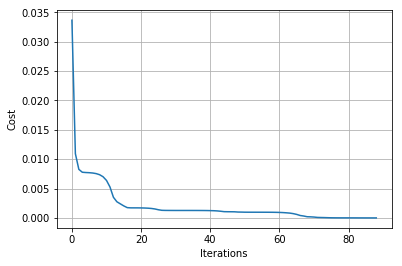

In [44]:
plt.plot(T.J)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [45]:
NN.costFunctionPrime(x_,y_)

(array([[ 1.34917137e-07,  1.97640273e-06, -6.07628225e-08],
        [ 1.09133935e-07,  1.76360077e-06, -6.53589286e-08]]),
 array([[-2.55900567e-06],
        [-5.86775700e-07],
        [-2.77280379e-06]]))

In [47]:
NN.forward(x_)

array([[0.74999632],
       [0.81999591],
       [0.92997684]])

In [49]:
y_

array([[0.75],
       [0.82],
       [0.93]])

In [53]:
#Test network for various combinations of sleep/study:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Create 2-d versions of input for plotting
a, b  = np.meshgrid(hoursSleepNorm, hoursStudyNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [54]:
allOutputs = NN.forward(allInputs)

Text(0,0.5,'Hours Study')

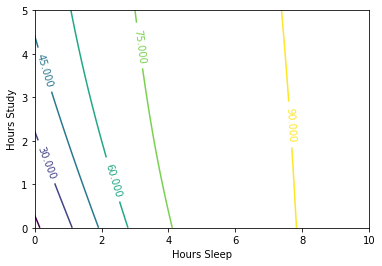

In [58]:
#Contour Plot:
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = plt.contour(xx,yy,100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('Hours Sleep')
plt.ylabel('Hours Study')

In [85]:
#3D plot:

##Uncomment to plot out-of-notebook (you'll be able to rotate)
%matplotlib qt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), 
                       cmap='jet')

ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

Text(0.5,0,'Test Score')